<a href="https://colab.research.google.com/github/Guest1537/AD-BP_mvp/blob/main/MVP_ML%26A_Pedro_Caleffi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning & Analytics - PUC-Rio

## Minimum Viable Product - MVP

#### Pedro Caleffi Barbosa 2024

Visando a facilitação no momento da avaliação, se listará abaixo os pontos evidenvciados como essenciais para a avaliação do produto por parte da equipe da PUC-Rio:

1. Definição do problema

1.1 Qual é a descrição do problema?

1.2 Você tem premissas ou hipóteses sobre o problema? Quais?

1.3 Que restrições ou condições foram impostas para selecionar os dados?

1.4 Descreva o seu dataset (atributos, imagens, anotações, etc).

2. Preparação de Dados

2.1 Separe o dataset entre treino e teste (e validação, se aplicável).
Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.

2.2 Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.

2.3 Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

3. Modelagem e treinamento:

3.1 Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.

3.2 Há algum ajuste inicial para os hiperparâmetros?

3.3 O modelo foi devidamente treinado? Foi observado problema de underfitting?

3.4 É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.

3.5 Há algum método avançado ou mais complexo que possa ser avaliado?

3.6 Posso criar um comitê de modelos diferentes para o problema (ensembles)?

4. Avaliação de resultados

4.1 Selecione as métricas de avaliação condizentes com o problema, justificando.

4.2 Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.

4.3 Os resultados fazem sentido?

4.4 Foi observado algum problema de overfitting?

4.5 Compare os resultados de diferentes modelos.

4.6 Descreva a melhor solução encontrada, justificando.

\

Ao longo deste notebook será evidenciado pelo respectivo número cada momento em que cada ponto do checklist será cumprido.

# 1. Definição do problema
### 1.1 Descrição do problema
No sistema bancário existe o setor de crédito estressado, responsável pela recuperação de capital em operações inadimplentes. Tal setor tem apresentado grande desenvolvimento nos últimos anos por diversos fatores, dentre eles, os impactos da pandemia de COVID-19 e a consequente falência de diversas empresas.
Neste setor é frequentemente adotada a execução extrajudicial de garantias em operações financeiras (bens móveis ou imóveis, como carros ou terrenos, respectivamente) e tais execuções incorrem na criação de autos processuais, compostos e desenvolvidos pelas Partes do processo (Exequente/Executado, Credor/Devedor).
Em casos onde o credor não consegue finalizar a operação de recuperação de crédito dentro da competencia da recuperação judicial, existe a possibilidade de cessão do crédito judicial para terceiros.
Terceiros interessados na aquisição de um crédito judicial analisam os movimentos processuais para verificar seu interesse em adquirir o crédito. Ditos processos podem chegar a ter centenas de milhares de páginas, especialmente em processos de recuperação judicial, o que demanda centenas de horas-trabalho, sendo este o problema que se visa solucionar com a automação da detecção de dados das garantias de processos judiciais.
Tendo em vista a limitação temporal, este trabalho se concentra apenas em matrículas de imóveis e a identificação de informações vinculadas à esse tipo de certidão.


Neste MVP se treina modelos de machine learning visando classificação.


### 1.2 Premissas e hipóteses
Processos judiciais podem apresentar operações financeiras vinculadas à imóveis ou não.
Todo processo judicial possui duas partes interessadas, um tribunal ao qual está relacionado.
Informações disponíveis sobre o imóvel apresentado na certidão da matrícula podem variar, assim como a formatação do documento.
Existem milhares de cartórios de registros de Imóveis no Brasil, os responsáveis pela emissão, registro e gestão de documentos de matrículas de imóveis.
Toda matrícula de imóvel representa um único imóvel, com vaga de garagem vinculada ou não. Existe a possibilidade de diversas matrículas formarem um único imóvel.
Cada matrícula possuí um único número a representando e vinculado a um único Cartório de Registro de Imóveis, que será classificado em uma string contendo número e CRI de registro.
Existem casos onde as matrículas de um único imóvel são registradas em diferentes CRIs, estes casos são excessão e são corrigidos assim que percebidos, por não se tratar da maneira correta do registro do imóvel.
Documentos se matrícula de imóvel podem apresentar operações financeiras vinculadas ou não. Dentre as operações possíveis se ressalta: Cédula de Crédito Bancário (CCB), Cédula de Crédito Comercial (CCC), Cédula de Crédito à Exportação (CCE), Cédula de Crédito Industrial (CCI), Cédula Rural Hipotecária (CRH), Cédula Rural Pignoraticia e Hipotecária (CRPH), Contrato de Câmbio (CC), Escritura Pública de Confissão e Assunção de Dívida (EPCAD, doravante denominado apenas "Escritura Pública" ou "EP").

### 1.3 Restrições e condições na seleção dos dados
Devido à profundidade do problema, se opta por sua solução parcial. Se apresenta um algorítimo de machine learning que identifica páginas de matrículas de imóveis encontradas durante a leitura de PDF. Para tal, se tranforma cada página de aquivo PDF em arquivo png para aplicação de easyOCR, seguido da vetorização dos textos com word2vec e treino, teste e validação do modelo.
Devido à realidade sigilosa de processos judiciais atuais, se opta pela simples utilização de arquivos de matrículas de imóveis, documentos não sigilosos, e outros documentos antigos para treino, teste e validação do modelo treinado.

### 1.4 Descrição do dataset
O dataset utilizado foi criado especificamente com intuíto de treinar este modelo. Foram selecionadas centenas de arquivos PDF contendo matrículas de imóveis e outros documentos aleatórios para validação do modelo. As matrículas de imóveis utilizadas foram retiradas de base de dados verificada internamente na empresa em que trabalho atualmente. Outros documentos utilizados para treino e teste foram encontrados em sites de tribunais do Brasil de maneira pública, tanto como através das plataformas estaduais de processos judiciais eletrônicos, através de consultas processuais públicas.
As imagens criadas com documentos de matrículas de imóveis serão classificadas como "matricula" e todos outras imagens serão classificadas como "outro".
Todos os documentos PDF são tranformados em .png para leitura do modelo.


Neste MVP se busca apresentar soluções iniciais para a demanda de processos internos em empresa do setor de créditos estressados, como evidenciados abaixo:

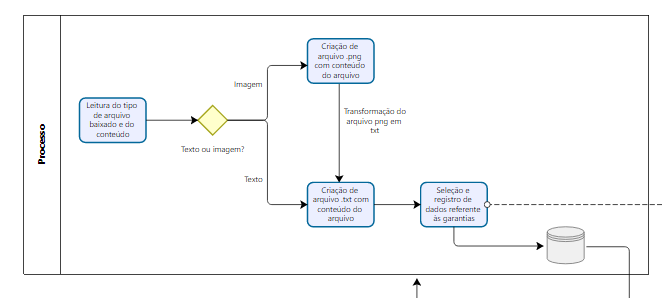



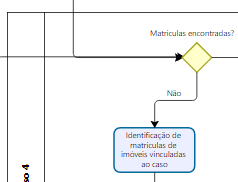

### Instalação de bibliotecas e download de pipeline

In [1]:
## Instalação das bibliotecas, caso necessário:
!pip install --upgrade nltk spacy summa numpy scikit-learn
!pip install gensim easyocr PyMuPDF pillow

# Download do pipeline para processamento de texto em português da Spacy.
!python3 -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Importação de bibliotecas

**Atenção!**

**Após instalação e downloads acima, reiniciar ambiente de execução antes de rodar o bloco de código abaixo**

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação das bibliotecas instaladas
import os  # Para file handling
import re  # Para preprocessing
import cv2 # Para pré-processamento das imagens
import gdown # Para download das imagens no google drive
import matplotlib.pyplot as plt
import nltk  # Para natural language handling
import numpy as np
import pandas as pd  # Para data handling
import spacy  # Para preprocessing
import sklearn
import sklearn.metrics as skm
import logging  # Setting up the loggings to monitor gensim
import easyocr # Para identificação e leitura de texto
import seaborn as sns # Para construção de heatmap
import joblib # Para melhorar eficiência na importação de dados


from gensim.models import Word2Vec # Para transformação de texto em vetores
from googleapiclient.discovery import build # Para interação com API do google

from google.colab import auth # Para aturização do acesso às pastas no google drive
from google.colab import drive # Para acesso aos arquivos PDF que formam o dataset


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, MaxAbsScaler # Para pré-processamento de imagens
from sklearn.model_selection import train_test_split # Para divisão dos dados e treinamento
from sklearn.model_selection import KFold # Para validação cruzada
from sklearn.model_selection import StratifiedKFold # Para estratificação do KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Para mensuração das estatísticas do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  # Para validação do modelo

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Base estimator for bagging
from sklearn.neighbors import KNeighborsClassifier # Para categorização de dados com base em pontos de dados mais próximos
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# arrumar!!!!!!!!!!!!!!!!!!!!!!!!!!!
import pickle
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import fitz  # Para trabalhar com PDFs
from sklearn.feature_selection import RFE


# Algorítimos para machine learning - Classificação
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from nltk.corpus import stopwords  # Para identificação de stopwords
from nltk.tokenize import word_tokenize  # Para tokenização de palavras
from nltk.tokenize import sent_tokenize  # Para tokenização de frases
from nltk.stem import WordNetLemmatizer  # Para lemmatization

from PIL import Image # Para leitura de imagem

from time import time  # To time our operations
from collections import defaultdict  # For word frequency

# Baixar o recurso punkt, caso não disponível na máquina
nltk.download('punkt')

# Configura o logging para leitura do texto
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Desenvolvimento e carga do Dataset

Em razão da demanda específica para o produto em contrução aqui apresentado, se utilzia do ambiente google drive, devido à realidade do ambiente digital da empresa em questão.

In [2]:
# Montagem de ambiente google drive no Colab
drive.mount("/content/drive", force_remount=True) # Caso já hava ambiente google drive aberto, se força sua remontagem

Mounted at /content/drive


In [3]:
# Specify the folder ID
folder_id = 'MVP3_PUCRJ'

# Define the directory path
directory_path = f'/content/drive/MyDrive/{folder_id}'

# List files in the directory
files = os.listdir(directory_path)
print("Files in the directory:")
for file in files:
    print(file)

Files in the directory:
Matr. 89446.pdf
Matr. 62852.pdf
Matr. 95109.pdf
Matr. 87250.pdf
Matr. 110869.pdf
Matr. 110891.pdf
Matr. 110892.pdf
Matr. 110907.pdf
Matr. 31623.pdf
Matr. 33968.pdf
Matr. 4052.pdf
Matr. 65438.pdf
Matr. 67088.pdf
Matr. 39946.pdf
Matr. 67812.pdf
Matr. 9786.pdf
Matr. 5996.pdf
Matr. 2250.pdf
Matr. 2253.pdf
Matr. 25540.pdf
Matr. 12894.pdf
Matr. 586.pdf
Matr. 43900.pdf
Matr. 16290.pdf
Matr. 195.pdf
Matr. 590.pdf
Matr. 37794.pdf
Matr. 20244.pdf
Matr. 20245.pdf
Matr. 20246.pdf
Matr. 20247.pdf
Matr. 20248.pdf
Matr. 20249.pdf
Matr. 20250.pdf
Matr. 20251.pdf
Matr. 20252.pdf
Matr. 20253.pdf
Matr. 20254.pdf
Matr. 24204.pdf
Matr. 33678.pdf
Matr. 33679.pdf
Matr. 22602.pdf
Matr. 22603.pdf
Matr. 22604.pdf
Matr. 0011107.pdf
Matr. 8346.pdf
Matr. 1520.pdf
Matr. 5322.pdf
Matr. 991.pdf
Matr. 992.pdf
Matr. 2210.pdf
Matr. 1512.pdf
Matr. 1501.pdf
Matr. 205.pdf
Matr. 419.pdf
Matr. 19135.pdf
Matr. 19137.pdf
Matr. 19138.pdf
Matr. 58513.pdf
Matr. 31527.pdf
Matr. 31627.pdf
Matr. 33150.pdf
Mat

Tranformação de arquivo PDF para PNG sendo cada página retirada do PDF transformada em um arquivo png, caso não exista

In [4]:
# Função para converter PDF em PNG de arquivos de matrículas de imóveis
def pdf_to_png(pdf_path, output_folder):
    # Abra o arquivo PDF
    pdf_document = fitz.open(pdf_path)
    # Itere sobre todas as páginas do PDF
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        # Renderiza a página como uma imagem
        image = page.get_pixmap()
        # Cria uma imagem PIL a partir dos dados de imagem renderizados
        image_pil = Image.frombytes("RGB", (image.width, image.height), image.samples)
        # Salva a imagem como PNG
        image_filename = f'{os.path.basename(pdf_path)}_page_{page_num + 1}.png'
        image_path = os.path.join(output_folder, image_filename)
        # Verifica se o arquivo já existe
        if not os.path.exists(image_path):
            image_pil.save(image_path, "PNG")
            print(f'Página {page_num + 1} do {os.path.basename(pdf_path)} salva como {image_path}')
        else:
            print(f'O arquivo {image_filename} já existe.')
# Pasta no Google Drive onde estão os arquivos PDF
pdf_folder = '/content/drive/MyDrive/MVP3_PUCRJ'

# Pasta de saída no Google Drive
output_folder = '/content/drive/MyDrive/MVP3_PUCRJ_pngfile'

# Percorre todos os arquivos PDF na pasta
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        pdf_to_png(pdf_path, output_folder)


O arquivo Matr. 89446.pdf_page_1.png já existe.
O arquivo Matr. 89446.pdf_page_2.png já existe.
O arquivo Matr. 89446.pdf_page_3.png já existe.
O arquivo Matr. 89446.pdf_page_4.png já existe.
O arquivo Matr. 89446.pdf_page_5.png já existe.
O arquivo Matr. 89446.pdf_page_6.png já existe.
O arquivo Matr. 89446.pdf_page_7.png já existe.
O arquivo Matr. 89446.pdf_page_8.png já existe.
O arquivo Matr. 89446.pdf_page_9.png já existe.
O arquivo Matr. 89446.pdf_page_10.png já existe.
O arquivo Matr. 89446.pdf_page_11.png já existe.
O arquivo Matr. 89446.pdf_page_12.png já existe.
O arquivo Matr. 89446.pdf_page_13.png já existe.
O arquivo Matr. 89446.pdf_page_14.png já existe.
O arquivo Matr. 89446.pdf_page_15.png já existe.
O arquivo Matr. 89446.pdf_page_16.png já existe.
O arquivo Matr. 89446.pdf_page_17.png já existe.
O arquivo Matr. 89446.pdf_page_18.png já existe.
O arquivo Matr. 89446.pdf_page_19.png já existe.
O arquivo Matr. 89446.pdf_page_20.png já existe.
O arquivo Matr. 89446.pdf_pag

#### Pré-processamento de Imagens

In [13]:
# Caminhos das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_pngfile"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc"

# Certifique-se de que a pasta de destino existe ou crie-a se não existir
os.makedirs(pasta_destino, exist_ok=True)

# Função para pré-processar uma imagem
def preprocess_image(image_path, output_path, target_size=(2100, 2970)):
    """Função para pré-processar uma imagem.

    Parâmetros:
    - image_path: Caminho para a imagem original.
    - output_path: Caminho para salvar a imagem pré-processada.
    - target_size: Tamanho para redimensionar a imagem. (2100, 2970).

    Retorna:
    - image: Imagem pré-processada.
    """
    try:
        # Verificar se o arquivo de destino já existe
        if not os.path.exists(output_path):
            # Carregar a imagem em escala de cinza
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Verificar se a imagem foi carregada corretamente
            if image is None:
                raise FileNotFoundError(f"A imagem não pôde ser carregada a partir de {image_path}")

            # Redimensionar a imagem para o tamanho padrão
            image = cv2.resize(image, target_size)

            # Aplicar operações morfológicas para melhorar palavras
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
            image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

            # Salvar a imagem pré-processada
            cv2.imwrite(output_path, image)

            print(f"A imagem pré-processada foi salva em {output_path}")

            # Retornar a imagem pré-processada
            return image
        else:
            print(f"O arquivo {output_path} já existe. Pulando o pré-processamento.")
            return None

    except Exception as e:
        print(f"Erro durante o pré-processamento da imagem: {e}")
        return None

# Percorre todas as imagens na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifica se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Caminho completo para a imagem de origem
        caminho_imagem = os.path.join(pasta_origem, arquivo)

        # Caminho completo para salvar a imagem pré-processada
        caminho_destino = os.path.join(pasta_destino, arquivo)

        # Pré-processar a imagem e salvar na pasta de destino
        preprocess_image(caminho_imagem, caminho_destino)

O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 199463.pdf_page_2.png já existe. Pulando o pré-processamento.
O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 199463.pdf_page_3.png já existe. Pulando o pré-processamento.
O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 199463.pdf_page_4.png já existe. Pulando o pré-processamento.
O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 199463.pdf_page_5.png já existe. Pulando o pré-processamento.
O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 199463.pdf_page_6.png já existe. Pulando o pré-processamento.
O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 179943.pdf_page_1.png já existe. Pulando o pré-processamento.
O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 179943.pdf_page_2.png já existe. Pulando o pré-processamento.
O arquivo /content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc/Matr. 179943.pdf_page_3.png já existe. Pulan

#### Extração do texto das imagens

ABAIXO LEITURA DE ARQUIVO PNG PRÉ-PROCESSADO, EXTRAÇÃO DO TEXTO E SALVAMENTO COMO ARQUIVO TXT

ESTE BLOCO DE CÓDIGO DEMORA DIAS PARA FINALIZAR!

In [ ]:
# Caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted"

# Inicialização do leitor de OCR em português
reader = easyocr.Reader(['pt'])

# Itere sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Caminho completo para a imagem de origem
    caminho_imagem = os.path.join(pasta_origem, arquivo)

    # Verifique se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Crie o caminho do arquivo de texto correspondente na pasta de destino
        base_filename = os.path.splitext(arquivo)[0]  # Retire a extensão do nome do arquivo de imagem
        output_path = os.path.join(pasta_destino, f"{base_filename}.txt")

        # Verifique se o arquivo de texto já existe na pasta de destino
        if os.path.exists(output_path):
            print(f"O arquivo de texto {output_path} já existe. Não foi extraído texto para {caminho_imagem}.")
            continue

        # Carregue a imagem
        image = cv2.imread(caminho_imagem)

        # Converta a imagem para escala de cinza
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Aplique a binarização usando limiar adaptativo
        image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Repita o processo de binarização para refinar a imagem e melhorar a leitura do texto
        image = image_binarized
        image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Use o OCR para ler o texto na imagem processada
        result = reader.readtext(image_binarized)

        # Salve o texto extraído em um arquivo de texto
        with open(output_path, "w", encoding="utf-8") as f:
            for item in result:
                # O item[1] contém o texto extraído
                f.write(item[1] + "\n")

        print(f"Texto extraído de {caminho_imagem} e salvo em {output_path}")

#### Pré-processamento do texto e definição da pasta contendo o dataset
A pasta é formada pelos arquivos texto pré-processados. Eles foram obtidos a partir do pré-processamento das imagens originais (matrículas de imóveis e outros documentos de exemplo), seguido do uso da ferramento OGC para identificação do texto nas imagens e sua transcrição para um arquivo texto.

Ressalta-se aqui, que a tese por trás do uso dessa fonte de dados é baseado em seu futuro uso e refino com uma base mais bem estruturada de dados, com aspecto sigiloso, em outras palavras, não pode ser disponiilizado em link público.

In [3]:
# Defina o caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc"

# Certifique-se de que a pasta de destino existe, caso contrário, crie-a
os.makedirs(pasta_destino, exist_ok=True)

# Função para pré-processar texto
def preprocess_text(text):
    # Converter o texto para minúsculas
    text = text.lower()

    # Remover pontuações e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)

    # Remover múltiplos espaços em branco
    text = re.sub(r'\s+', ' ', text)

    return text

# Itere sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifique se o arquivo é um arquivo de texto
    if arquivo.endswith(".txt"):
        # Caminho completo para o arquivo de texto de origem
        caminho_arquivo_origem = os.path.join(pasta_origem, arquivo)

        # Leia o conteúdo do arquivo de texto
        with open(caminho_arquivo_origem, 'r', encoding='utf-8') as file:
            conteudo = file.read()

        # Pré-processa o texto
        texto_preprocessado = preprocess_text(conteudo)

        # Caminho completo para o arquivo de texto pré-processado na pasta de destino
        caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)

        # Salva o texto pré-processado no arquivo de texto na pasta de destino
        with open(caminho_arquivo_destino, 'w', encoding='utf-8') as file:
            file.write(texto_preprocessado)

        print(f"Arquivo {arquivo} pré-processado e salvo em {caminho_arquivo_destino}.")

Arquivo Matr. 21218.pdf_page_5.txt pré-processado e salvo em /content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc/Matr. 21218.pdf_page_5.txt.
Arquivo Matr. 21218.pdf_page_6.txt pré-processado e salvo em /content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc/Matr. 21218.pdf_page_6.txt.
Arquivo Matr. 21218.pdf_page_7.txt pré-processado e salvo em /content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc/Matr. 21218.pdf_page_7.txt.
Arquivo Matr. 21218.pdf_page_8.txt pré-processado e salvo em /content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc/Matr. 21218.pdf_page_8.txt.
Arquivo Matr. 21218.pdf_page_9.txt pré-processado e salvo em /content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc/Matr. 21218.pdf_page_9.txt.
Arquivo Matr. 21218.pdf_page_10.txt pré-processado e salvo em /content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc/Matr. 21218.pdf_page_10.txt.
Arquivo Matr. 21218.pdf_page_11.txt pré-processado e salvo em /content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc/Mat

### Definição da pasta contendo o dataset

In [8]:
# Apenas definição do dataset, visando agilidade da execução do código
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc"

# 2. Preparação dos dados


### Treinamento do modelo - word2vec básico

In [9]:
# Adiciona os textos dos arquivos já pré-processados ao vocabulário
arquivos_preprocessados = os.listdir(pasta_destino)
textos_preprocessados = []

for arquivo in arquivos_preprocessados:
    caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)
    with open(caminho_arquivo_destino, 'r', encoding='utf-8') as file:
        conteudo = file.read()
        texto_preprocessado = preprocess_text(conteudo)
        textos_preprocessados.append(texto_preprocessado)

# Inicializar e ajustar o vetorizador CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(textos_preprocessados)

# Salvar o vetorizador CountVectorizer
path_vectorizer = "/content/drive/MyDrive/trained_vectors"
os.makedirs(path_vectorizer, exist_ok=True)
name_vectorizer = "vectorizer.pkl"
joblib.dump(vectorizer, os.path.join(path_vectorizer, name_vectorizer))
print(f"Vetorizador salvo em {os.path.join(path_vectorizer, name_vectorizer)}.")

# Inicializar e treinar o modelo Word2Vec
# Suponha que 'textos_preprocessados' seja a lista de textos tokenizados
word2vec_model = Word2Vec(textos_preprocessados, min_count=1, vector_size=100)

# Salvar o modelo Word2Vec
path_word2vec_model = "/content/drive/MyDrive/trained_models"
os.makedirs(path_word2vec_model, exist_ok=True)
name_word2vec_model = "word2vec_model.bin"
word2vec_model.save(os.path.join(path_word2vec_model, name_word2vec_model))
print(f"Modelo Word2Vec salvo em {os.path.join(path_word2vec_model, name_word2vec_model)}.")

Vetorizador salvo em /content/drive/MyDrive/trained_vectors/vectorizer.pkl.
Modelo Word2Vec salvo em /content/drive/MyDrive/trained_models/word2vec_model.bin.


In [11]:
# Carregar o vetorizador
path_vectorizer = "/content/drive/MyDrive/trained_vectors/vectorizer.pkl"
with open(path_vectorizer, 'rb') as f:
    vectorizer = pickle.load(f)

# Carregar o modelo Word2Vec
path_word2vec_model = "/content/drive/MyDrive/trained_models/word2vec_model.bin"
word2vec_model = Word2Vec.load(path_word2vec_model)

# Diretório dos textos pré-processados
directory_texts = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc"

# Função para ler os textos de um diretório
def read_texts_directory(directory):
    texts = []
    titles = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            texts.append(text)
            titles.append(file)
    return texts, titles

# Função para criar rótulos com base nos títulos dos arquivos
def create_labels(titles):
    labels = []
    keywords = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    for title in titles:
        if any(re.search(fr'\b{word}\b', title, flags=re.IGNORECASE | re.UNICODE) for word in keywords):
            labels.append('matrícula')
        else:
            labels.append('outro')
    return labels

# Ler textos do diretório e criar rótulos
texts, titles = read_texts_directory(directory_texts)
labels = create_labels(titles)

# (Checklist ponto 2.1) Dividir dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Definir a função verificar_matricula
def check_registration(tokens, model):
    # Palavras-chave para classificar como matrícula (tentativa)
    keywords = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    # Verificar a presença de "matr", "matr.", "matrícula" ou "matrícula."
    if any(re.search(fr'\b{word}\b', token, flags=re.IGNORECASE | re.UNICODE) for token in tokens for word in keywords):
        return "matrícula"
    else:
        return "outro"

# Definir a função avaliar_modelo
def evaluate_model(model, test_texts, test_classifications):
    predictions = []
    out_of_vocab_words = set()
    for tokens, _ in zip(test_texts, test_classifications):
        tokens_in_vocab = [word for word in tokens if word in model.wv]
        if tokens_in_vocab:
            # Aqui você pode usar o vetor de texto para fazer previsões com seu modelo de classificação
            prediction = check_registration(tokens, model)
            predictions.append(prediction)
        else:
            out_of_vocab_words.update(set(tokens))
            predictions.append('outro')

    accuracy = accuracy_score(test_classifications, predictions)
    print(f"A precisão do modelo é: {accuracy}")
    if out_of_vocab_words:
        print(f"Palavras fora do vocabulário: {out_of_vocab_words}")

# Avaliar o modelo Word2Vec
evaluate_model(word2vec_model, X_test, Y_test)

# Salvar o modelo Word2Vec novamente
path_saved_model = '/content/drive/MyDrive/Word2Vec_model'
word2vec_model.save(path_saved_model)

print(f"Modelo Word2Vec salvo em {path_saved_model}.")

A precisão do modelo é: 0.32510288065843623
Modelo Word2Vec salvo em /content/drive/MyDrive/Word2Vec_model.


# Aplicação de modelos

### Teste do modelo word2vec

In [4]:
# Diretório com os arquivos de teste
directory_test = '/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc_test'

# Carregar o modelo Word2Vec
word2vec_model_loaded = Word2Vec.load('/content/drive/MyDrive/Word2Vec_model')

# Função para tokenizar um documento
def tokenize_document(document):
    return document.lower().split()

# Função para classificar se um texto é uma matrícula ou não
def classify_registration(text, model):
    # Tokenizar o texto do arquivo
    tokens = tokenize_document(text)

    # Verificar a presença de "matr" ou "matr." nos tokens
    if any(re.search(r'\bmatr\.?\b', token) for token in tokens):
        return "matrícula"
    else:
        return "outro"

# Função para calcular a taxa de acerto do modelo
def calculate_accuracy_rate(model, test_texts, test_classifications):
    total = 0
    correct = 0
    for text, real_classification in zip(test_texts, test_classifications):
        predicted_classification = classify_registration(text, model)
        total += 1
        if predicted_classification == real_classification:
            correct += 1
    accuracy_rate = (correct / total) * 100 if total > 0 else 0
    return accuracy_rate

# Carregar textos de teste e suas classificações reais
test_texts = []
test_classifications = []
for file_name in os.listdir(directory_test):
    if file_name.endswith('.txt'):
        file_path = os.path.join(directory_test, file_name)
        with open(file_path, 'r', encoding='utf-8') as text_file:
            text = text_file.read()
            test_texts.append(text)
            real_classification = "matrícula" if "matr" in file_name.lower() else "outro"
            test_classifications.append(real_classification)

# Calcular a taxa de acerto do modelo no conjunto de teste
accuracy_rate_test = calculate_accuracy_rate(word2vec_model_loaded, test_texts, test_classifications)
print(f"Taxa de acerto do modelo no conjunto de teste: {accuracy_rate_test:.2f}%")


Taxa de acerto do modelo no conjunto de teste: 41.67%


Observa-se um resultado muito aquém do ótimo, ainda mais tendo em vista como o modelo está classificando os arquivos apenas entre duas classes.

Tendo em vista o resultado acima inferior a 50%, verifica-se claramente a ineficácia do modelo word2vec para o problema exposto, ressaltado pelos vetores retornados no código de treinamento do modelo.

É clara a necessidade de melhor pré-processamento das imagens para uso da bilioteca cv2.

Abaixo se faz o teste de outros tipos de modelagem para verificar o melhor resultado.

### Conversão de vetores para matriz de valores para uso em outros modelos

2.1 Divisão dos dados numéricos entre treino e teste

2.2 Operações de transformação de dados

In [5]:
# Carregar o vetorizador
caminho_vetorizador = '/content/drive/MyDrive/trained_vectors/vectorizer.pkl'
with open(caminho_vetorizador, 'rb') as f:
    vetorizador = pickle.load(f)

# Diretório dos textos pré-processados
diretorio_textos = '/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc'

# Função para ler os textos de um diretório
def ler_textos_diretorio(diretorio):
    textos = []
    titulos = []
    for arquivo in os.listdir(diretorio):
        caminho_arquivo = os.path.join(diretorio, arquivo)
        with open(caminho_arquivo, 'r', encoding='utf-8') as f:
            texto = f.read()
            textos.append(texto)
            titulos.append(arquivo)
    return textos, titulos

# Função para criar rótulos com base nos títulos dos arquivos
def criar_rotulos(titulos):
    rotulos = []
    palavras_chave = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    for titulo in titulos:
        if any(re.search(fr'\b{palavra}\b', titulo, flags=re.IGNORECASE | re.UNICODE) for palavra in palavras_chave):
            rotulos.append('matrícula')
        else:
            rotulos.append('outro')
    return rotulos

# Ler textos do diretório e criar rótulos
textos, titulos = ler_textos_diretorio(diretorio_textos)
rotulos = criar_rotulos(titulos)

# Dividir dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(textos, rotulos, test_size=0.2, random_state=42)

# Vetorizar os textos de treino e teste
X_train_vetorizado = vetorizador.transform(X_train)
X_test_vetorizado = vetorizador.transform(X_test)

# Converter vetores TF-IDF em matrizes densas
X_train_matriz = X_train_vetorizado.toarray()
X_test_matriz = X_test_vetorizado.toarray()

### Testando modelos com dados originais e padronizados

In [6]:
# Normalizar os dados de entrada
scaler = StandardScaler(with_mean=False)
X_train_normalized = scaler.fit_transform(X_train_matriz)
X_test_normalized = scaler.transform(X_test_matriz)

# Lista para armazenar os modelos
models = []

# Adicionando os modelos à lista
# Se optou pela utilização dos modelos abaixo em razão à viabilidade de seu uso. Outros modelos apresentaram muita demora para sua execução
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Lista para armazenar resultados e nomes dos modelos
results = {'Original': [], 'Padronizado': []}
names = []

### Testando e avaliando modelos com e sem validação cruzada

In [32]:
# Testar os modelos com os dados de teste originais e padronizados
# Não estão sendo realizados testes com dados normalizados pois se observou em testes prévios que o resultado dos modelos era idêntico aos resultados com dados originais
for name, model in models:
    if name == 'NB':
        model.fit(X_train_matriz, Y_train)
        score_original = model.score(X_test_matriz, Y_test)
        model.fit(X_train_normalized, Y_train)
        score_padronizado = model.score(X_test_normalized, Y_test)
    else:
        model.fit(X_train_matriz, Y_train)
        score_original = model.score(X_test_matriz, Y_test)
        model.fit(X_train_normalized, Y_train)
        score_padronizado = model.score(X_test_normalized, Y_test)
    msg = f"{name}: Original: {score_original:.4f}, Padronizado: {score_padronizado:.4f}"
    print(msg)

LR: Original: 0.9342, Padronizado: 0.8601
KNN: Original: 0.7037, Padronizado: 0.3004
CART: Original: 0.8807, Padronizado: 0.8601
NB: Original: 0.7654, Padronizado: 0.7695


In [33]:
# Avaliar os modelos usando validação cruzada
# Não estão sendo realizados testes com dados normalizados pois se observou em testes prévios que o resultado dos modelos era idêntico aos resultados com dados originais

for name, model in models:
    scores_original = cross_val_score(model, X_train_matriz, Y_train, cv=5)
    scores_padronizado = cross_val_score(model, X_train_normalized, Y_train, cv=5)
    results['Original'].append(scores_original.mean())
    results['Padronizado'].append(scores_padronizado.mean())
    names.append(name)
    msg = f"{name}: Original: {scores_original.mean():.4f}, Padronizado: {scores_padronizado.mean():.4f}"
    print(msg)

LR: Original: 0.9026, Padronizado: 0.6433
KNN: Original: 0.6597, Padronizado: 0.3004
CART: Original: 0.8862, Padronizado: 0.8793
NB: Original: 0.8080, Padronizado: 0.8025


Como observado pelos dados acima, o melhor modelo a ser aplicado aparenta ser de Regressão Logística para os dados originais. Irá se realizar o teste com validação cruzada a seguir.

In [24]:
# Lista para armazenar acurácias dos modelos
accuracies = []

# Avaliar e apresentar a acurácia de cada modelo
for name, model in models:
    # Treinar o modelo
    model.fit(X_train_matriz, Y_train)

    # Fazer previsões
    predictions = model.predict(X_test_matriz)

    # Calcular acurácia
    accuracy = accuracy_score(Y_test, predictions)
    accuracies.append((name, accuracy))

    # Apresentar a acurácia do modelo
    print(f"Acurácia do modelo {name}: {accuracy:.4f}")

# Calcular a acurácia média dos modelos
average_accuracy = np.mean([accuracy for _, accuracy in accuracies])
std_deviation = np.std([accuracy for _, accuracy in accuracies])
print(f"Acurácia média dos modelos: {average_accuracy:.4f} (Desvio Padrão: {std_deviation:.4f})")

Acurácia do modelo LR: 0.9506
Acurácia do modelo KNN: 0.6420
Acurácia do modelo CART: 0.8971
Acurácia do modelo NB: 0.7695
Acurácia média dos modelos: 0.8148 (Desvio Padrão: 0.1195)


Como evidenciado acima, o melhor modelo aparenta ser de Regrassão Logística. Para validação será realizada nova avaliação a seguir.

### Outro método de teste e avaliação, com global seed definida

In [23]:
# Defining a global seed
np.random.seed(7)

# Models to be used
reg_log = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
naive_bayes = GaussianNB()

# Transformations to be used
standard_scaler = StandardScaler(with_mean=False)
max_abs_scaler = MaxAbsScaler()

# List to store pipelines and results for all dataset views
pipelines = []
results = []
names = []

# Creating pipelines
for model_name, model in [('LR', reg_log), ('KNN', knn), ('CART', cart), ('NB', naive_bayes)]:
    # Original dataset
    pipelines.append((f'{model_name}-orig', Pipeline([(model_name, model)])))

    # Standardized dataset
    pipelines.append((f'{model_name}-padr', Pipeline([('StandardScaler', standard_scaler), (model_name, model)])))

    # Normalized dataset
    pipelines.append((f'{model_name}-norm', Pipeline([('MaxAbsScaler', max_abs_scaler), (model_name, model)])))

# Define the number of folds for cross-validation
cv = 5  # You can adjust this value according to your preference

# Define a métrica de avaliação como a taxa de acerto (accuracy)
scoring = 'accuracy'

In [ ]:
# Executando os pipelines
for name, model in pipelines:
    if name.startswith('NB'):  # Se o modelo for Naive Bayes
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    else:
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Taxa de acerto média: %.3f (Desvio Padrão: %.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)  # Imprime os resultados de cada modelo testado com 3 casas decimais

LR-orig: Taxa de acerto média: 0.828 (Desvio Padrão: 0.046)
LR-padr: Taxa de acerto média: 0.872 (Desvio Padrão: 0.025)


In [ ]:
# Criar figura e eixos para o boxplot
plt.figure(figsize=(10, 6))

# Plotar boxplot dos resultados
plt.boxplot(results, labels=names)

# Adicionar título e rótulos dos eixos
plt.title('Boxplot dos Resultados')
plt.xlabel('Modelos')
plt.ylabel('Taxa de Acerto')

# Exibir o boxplot
plt.xticks(rotation=45)  # Rotacionar os rótulos dos modelos para melhor visualização
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição de elementos
plt.show()

Como observado acima, a melhor aplicação de modelo foi identificada como o uso de Regressão Logística normalizado, contradizendo dados previamente obtidos. Tendo em vista essa realidade, será realizada a aplicação de ensamble Voting Classifier com objetivo de identificação do melhor modelo possível no momento.

In [22]:
# Identificar o índice do modelo com a melhor taxa de acerto
melhor_indice = np.argmax([np.mean(result) for result in results])

# Obter o nome do pipeline e a taxa de acerto do modelo vencedor
melhor_nome = names[melhor_indice]
melhor_taxa_acerto = np.max(results[melhor_indice])

# Salvar o modelo vencedor
melhor_modelo = pipelines[melhor_indice][1]
data_hoje = datetime.date.today().strftime("%Y-%m-%d")  # Obter a data de hoje no formato YYYY-MM-DD
nome_arquivo = f"best_model_from_code_{data_hoje}.pkl"
path_salvar = '/content/drive/MyDrive/trained_models'
caminho_arquivo = f"{path_salvar}/{nome_arquivo}"
joblib.dump(melhor_modelo, caminho_arquivo)

print(f"Modelo com melhor taxa de acerto ({melhor_nome}) salvo em {caminho_arquivo}")
print(f"Taxa de acerto: {melhor_taxa_acerto:.3f}")

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

3.1 Seleciona-se o algoritmo de LogisticRegression para dados normalizados como mais indicados em razão de sua eficiência (baixo tempo para execução) e acurácia aceitável, como evidenciado acima e copiado abaixo:
  
Taxa de acerto média: 0.924
Desvio Padrão: 0.012



2.3 Refina a quantidade de atributos disponíveis, realizando o processo de feature selection

In [21]:
# Definir o modelo a ser utilizado
model = LogisticRegression()

# Inicializar o seletor de features RFE (Eliminação Recursiva de Features)
seletor_features = RFE(model, n_features_to_select=10)  # Escolha o número desejado de features

# Aplicar o seletor de features aos dados de treinamento
X_train_selecionado = seletor_features.fit_transform(X_train_matriz, Y_train)

# Aplicar a mesma seleção de features aos dados de teste
X_test_selecionado = seletor_features.transform(X_test_matriz)

# Treinar o modelo com as features selecionadas
model.fit(X_train_selecionado, Y_train)

# Avaliar o desempenho do modelo
acuracia = model.score(X_test_selecionado, Y_test)
print(f'Acurácia do modelo com features selecionadas: {acuracia:.4f}')

KeyboardInterrupt: 

3.2 Não há ajuste inicial dos hiperparâmetros pois, tendo em vista como se trata de um dataset formado a partir de strings de texto transformadas em matriz de valores, é feita análise exploratória para ajuste posterior.

### 3.3 Avaliação de over/underfitting e treinamento do modelo

In [19]:
# 4.2 Treinar o modelo
model.fit(X_train_matriz, Y_train)

NameError: name 'model' is not defined

In [16]:
# Fazer previsões nos dados de treinamento e nos dados de validação (ou teste)
train_predictions = model.predict(X_train_matriz)


NameError: name 'model' is not defined

In [41]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_validation_array_encoded = label_encoder.fit_transform(X_validation_array)


# Fazer previsões nos dados de validação (ou teste)
validation_predictions = model.predict(X_validation_array.reshape(-1, 1))

# Calcular a acurácia nos dados de treinamento e nos dados de validação (ou teste)
train_accuracy = accuracy_score(Y_train, train_predictions)
validation_accuracy = accuracy_score(Y_validation, validation_predictions)

# Imprimir a acurácia nos dados de treinamento e nos dados de validação (ou teste)
print(f"Acurácia nos dados de treinamento: {train_accuracy:.4f}")
print(f"Acurácia nos dados de validação (ou teste): {validation_accuracy:.4f}")

# Verificar se houve underfitting ou overfitting
if train_accuracy > validation_accuracy:
    print("Possível overfitting: A acurácia nos dados de treinamento é maior do que nos dados de validação (ou teste).")
elif train_accuracy < validation_accuracy:
    print("Possível underfitting: A acurácia nos dados de treinamento é menor do que nos dados de validação (ou teste).")
else:
    print("O modelo parece ter sido treinado adequadamente, não há indicação de underfitting ou overfitting.")

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

4.4 Foi observado algum problema de overfitting?




# Refino de atributos

### 3.4 Otimização dos hiperparâmetros

Tendo em vista a transformação dos textos obtidos a partir dos documentos em vetores e, em seguida, em uma matriz de valores, se opta pela adoção do método GridSearchCV para identificar os melhores hiperparâmetros;

In [85]:
# Definindo os parâmetros para busca em grade
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search.fit(X_train_normalized, Y_train)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

# Atualizando o modelo LogisticRegression com os melhores hiperparâmetros
logistic_model = LogisticRegression(**best_params)


Melhores hiperparâmetros encontrados: {'C': 0.001}


# !!! 3.5 Há algum método avançado ou mais complexo que possa ser avaliado?


TALVEZ EXCLUIR 2 BLOCOS DE CÓDIGO ABAIXO

### Treinando o modelo com os melhore parâmetros

In [ ]:

# Treinando o modelo com os melhores parâmetros
logistic_model.fit(X_train_normalized, Y_train)

# Fazendo previsões nos dados de teste
predictions = logistic_model.predict(X_test_normalized)

### !!!Aplicação de ensemble Voting Classifier

alocar a aplicação de ensamble para após a otimização dos hiperparâmetros

In [84]:
# Lista para armazenar acurácias dos modelos
accuracies = []

# Adicionando o Voting Classifier aos pipelines
pipelines.append(('Voting', VotingClassifier(estimators=pipelines)))

# Executando os pipelines
for name, model in pipelines:
    if name == 'Voting':  # Se for o Voting Classifier
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    elif name.startswith('NB'):  # Se o modelo for Naive Bayes
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    else:
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Taxa de acerto média: %.3f (Desvio Padrão: %.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)  # Imprime os resultados de cada modelo testado com 3 casas decimais

    # Armazena a acurácia média e desvio padrão
    accuracies.append(cv_results.mean())

# Calcula a acurácia média e desvio padrão do ensemble
average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)
print(f"Acurácia média do ensemble: {average_accuracy:.4f} (Desvio Padrão: {std_deviation:.4f})")

LR-orig: Taxa de acerto média: 0.835 (Desvio Padrão: 0.059)
LR-padr: Taxa de acerto média: 0.881 (Desvio Padrão: 0.038)
LR-norm: Taxa de acerto média: 0.924 (Desvio Padrão: 0.012)
KNN-orig: Taxa de acerto média: 0.325 (Desvio Padrão: 0.011)
KNN-padr: Taxa de acerto média: 0.325 (Desvio Padrão: 0.011)
KNN-norm: Taxa de acerto média: 0.347 (Desvio Padrão: 0.007)
CART-orig: Taxa de acerto média: 0.892 (Desvio Padrão: 0.015)
CART-padr: Taxa de acerto média: 0.887 (Desvio Padrão: 0.014)
CART-norm: Taxa de acerto média: 0.903 (Desvio Padrão: 0.020)
NB-orig: Taxa de acerto média: 0.814 (Desvio Padrão: 0.028)
NB-padr: Taxa de acerto média: 0.821 (Desvio Padrão: 0.024)
NB-norm: Taxa de acerto média: 0.811 (Desvio Padrão: 0.032)


RecursionError: maximum recursion depth exceeded

# 3.6 !!SELECIONAR BLOCO DE CÓDIGO ACIMA OU ABAIXO PARA MANTER ENSEMBLES

In [44]:

# Lista para armazenar acurácias dos modelos
accuracies = []

# Definindo os pipelines
pipelines = [
    ('LR-orig', Pipeline([('LR', reg_log)])),
    ('LR-padr', Pipeline([('StandardScaler', standard_scaler), ('LR', reg_log)])),
    ('LR-norm', Pipeline([('MaxAbsScaler', max_abs_scaler), ('LR', reg_log)])),
    ('KNN-orig', Pipeline([('KNN', knn)])),
    ('KNN-padr', Pipeline([('StandardScaler', standard_scaler), ('KNN', knn)])),
    ('KNN-norm', Pipeline([('MaxAbsScaler', max_abs_scaler), ('KNN', knn)])),
    ('CART-orig', Pipeline([('CART', cart)])),
    ('CART-padr', Pipeline([('StandardScaler', standard_scaler), ('CART', cart)])),
    ('CART-norm', Pipeline([('MaxAbsScaler', max_abs_scaler), ('CART', cart)])),
    ('NB-orig', Pipeline([('NB', naive_bayes)])),
    ('NB-padr', Pipeline([('StandardScaler', standard_scaler), ('NB', naive_bayes)])),
    ('NB-norm', Pipeline([('MaxAbsScaler', max_abs_scaler), ('NB', naive_bayes)]))
]

# Adicionando o Voting Classifier aos pipelines
pipelines.append(('Voting', VotingClassifier(estimators=pipelines)))

# Executando os pipelines
for name, model in pipelines:
    if name == 'Voting':  # Se for o Voting Classifier
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    elif name.startswith('NB'):  # Se o modelo for Naive Bayes
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    else:
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Taxa de acerto média: %.3f (Desvio Padrão: %.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)  # Imprime os resultados de cada modelo testado com 3 casas decimais

    # Armazena a acurácia média e desvio padrão
    accuracies.append(cv_results.mean())

# Calcula a acurácia média e desvio padrão do ensemble
average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)
print(f"Acurácia média do ensemble: {average_accuracy:.4f} (Desvio Padrão: {std_deviation:.4f})")

AttributeError: 'dict' object has no attribute 'append'

# !!! 4.5 Compare os resultados de diferentes modelos.


# ! ERRO DAQUI PRA BAIXO

# 4.0 Avaliação de resultados

Imprimindo uma matriz de confusão

In [ ]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(Y_test, predictions)

# Imprimindo a matriz de confusão
print("Matriz de Confusão:")
print(conf_matrix)

# Plotando a matriz de confusão
plot_confusion_matrix(logistic_model, X_test_normalized, Y_test)
plt.title('Matriz de Confusão')
plt.show()

TALVEZ EXLCUIR 2 BLOCOS DE CÓDIGO ABAIXO

In [14]:
import joblib
from joblib import dump

import datetime


In [18]:
# Salve o melhor modelo para uso futuro

# Obtendo a data atual
data_atual = datetime.datetime.now().strftime("%Y-%m-%d")

# Construindo o nome do arquivo com base na data atual e informações sobre a origem do modelo
nome_model = f"best_model_from_code_{data_atual}.pkl"

# Caminho completo para salvar o modelo com o nome atualizado
caminho_destino_model = f"/content/drive/MyDrive/trained_models/{nome_model}"

# Salvando o pipeline inteiro com o nome atualizado e informações sobre a origem
dump(best_model, caminho_destino_model)
print(f"Modelo best_model salvo em {caminho_destino_model}.")

NameError: name 'best_model' is not defined

### Teste do modelo ótimo

### Preparo e disponibilização de conjunto de dados para validação do modelo

Reuso dos blocos de código utilizados previamente para montagem do dataset de treino inicial

In [ ]:
# Caminhos das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJpngvalidacao"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJpngvalidacao_preproc"

# Certifique-se de que a pasta de destino existe
if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

# Função para pré-processar uma imagem
def preprocess_image(image_path, output_path, target_size=(700, 990)):
    """Função para pré-processar uma imagem.

    Parâmetros:
    - image_path: Caminho para a imagem original.
    - output_path: Caminho para salvar a imagem pré-processada.
    - target_size: Tamanho para redimensionar a imagem. (700, 990).

    Retorna:
    - image: Imagem pré-processada.
    """
    try:
        # Verifica se o arquivo de saída já existe
        if os.path.exists(output_path):
            print(f"O documento {output_path} já existe. Ignorando o pré-processamento.")
            return None

        # Carregar a imagem em escala de cinza
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError(f"A imagem não pôde ser carregada a partir de {image_path}")

        # Redimensionar a imagem para o tamanho padrão
        image = cv2.resize(image, target_size)

        # Aplicar operações morfológicas para melhorar palavras
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
        image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

        # Salvar a imagem pré-processada
        cv2.imwrite(output_path, image)

        print(f"A imagem pré-processada foi salva em {output_path}")

        # Retornar a imagem pré-processada
        return image

    except Exception as e:
        print(f"Erro durante o pré-processamento da imagem: {e}")
        return None

# Percorre todas as imagens na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifica se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Caminho completo para a imagem de origem
        caminho_imagem = os.path.join(pasta_origem, arquivo)

        # Caminho completo para salvar a imagem pré-processada
        caminho_destino = os.path.join(pasta_destino, arquivo)

        # Pré-processar a imagem e salvar na pasta de destino
        preprocess_image(caminho_imagem, caminho_destino)


# Inicialização do leitor de OCR em português
reader = easyocr.Reader(['pt'])

# Caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJpngvalidacao_preproc"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_textvalidacao_extracted"

# Certifique-se de que a pasta de destino existe
os.makedirs(pasta_destino, exist_ok=True)

# Itere sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifique se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Caminho completo para a imagem de origem
        caminho_imagem = os.path.join(pasta_origem, arquivo)

        # Carregue a imagem
        image = cv2.imread(caminho_imagem)

        # Converta a imagem para escala de cinza
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Aplique a binarização usando limiar adaptativo
        image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Repita o processo a binarização para refinar a imagem e melhorar a leitura do texto (foram feitos testes prévios e assim a leitura foi mais precisa)
        image = image_binarized
        image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Use o OCR para ler o texto na imagem processada
        result = reader.readtext(image_binarized)

        # Crie o caminho do arquivo de texto correspondente na pasta de destino
        base_filename = os.path.splitext(arquivo)[0]  # Retire a extensão do nome do arquivo de imagem
        output_path = os.path.join(pasta_destino, f"{base_filename}.txt")

        # Salve o texto extraído em um arquivo de texto
        with open(output_path, "w", encoding="utf-8") as f:
            for item in result:
                # O item[1] contém o texto extraído
                f.write(item[1] + "\n")

        print(f"Texto extraído de {caminho_imagem} e salvo em {output_path}")


# Defina o caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_textvalidacao_extracted"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJtxtvalidacao_preproc"

# Certifique-se de que a pasta de destino existe, caso contrário, crie-a
os.makedirs(pasta_destino, exist_ok=True)

# Função para pré-processar texto
def preprocess_text(text):
    # Converter o texto para minúsculas
    text = text.lower()

    # Remover pontuações e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)

    # Remover múltiplos espaços em branco
    text = re.sub(r'\s+', ' ', text)

    return text

# Itere sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifique se o arquivo é um arquivo de texto
    if arquivo.endswith(".txt"):
        # Caminho completo para o arquivo de texto de origem
        caminho_arquivo_origem = os.path.join(pasta_origem, arquivo)

        # Leia o conteúdo do arquivo de texto
        with open(caminho_arquivo_origem, 'r', encoding='utf-8') as file:
            conteudo = file.read()

        # Pré-processa o texto
        texto_preprocessado = preprocess_text(conteudo)

        # Caminho completo para o arquivo de texto pré-processado na pasta de destino
        caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)

        # Salva o texto pré-processado no arquivo de texto na pasta de destino
        with open(caminho_arquivo_destino, 'w', encoding='utf-8') as file:
            file.write(texto_preprocessado)

        print(f"Arquivo {arquivo} pré-processado e salvo em {caminho_arquivo_destino}.")

### 4.1 Métricas de avaliação
Como evidenciado previamente, as métricas de avaliação do modelo são a tava de acerto (acurácia) e devio padrão. Com o objetivo de se acertar o máximo possível de previsões das strings de texto fornecidas e posteriormente transformadas em matriz de valores, o ideal seria uma taxa de acerto de 100% com DP de 0, porém isso é irreal. Neste caso, se opta, então pela adoção do supracitado.

### Comparação de resultados de diferentes modelos

### Melhor solução encontrada

### Exportação do modelo para uso posterior

## Validação do modelo

Exportação do modelo. Abaoxo se apresenta a lista de modelos previamente salvos, caso seja desejado realizar outros testes:
1. trained_model_2024-04-22T0231.pkl
2. best_model_from_code_2024-04-25.pkl


In [7]:

# Caminho para o diretório do modelo e nome do modelo
path_model = '/content/drive/MyDrive/trained_models'
name_model = 'best_model_from_code_2024-04-25.pkl'

# Carregar o modelo
loaded_model = joblib.load(f"{path_model}/{name_model}")
print("Modelo %s carregado com sucesso" % (name_model))

# Caminho para o diretório onde os arquivos de texto estão armazenados
parent_dir = '/content/drive/MyDrive/MVP3_PUCRJtxtvalidacao_preproc'

# Contadores para acompanhar o número total de arquivos processados
count = 0

# Percorrer a pasta onde estão salvos os arquivos de texto
for root, dirs, files in os.walk(parent_dir):
    for file in files:
        # Verificar se o arquivo é um arquivo de texto
        if file.endswith('.txt'):
            # Obter o caminho completo do arquivo
            file_path = os.path.join(root, file)

            # Atualizar o contador
            count += 1

            # Ler o conteúdo do arquivo de texto
            with open(file_path, 'r', encoding='utf-8') as f:
                texto = f.read()

            # Pré-processar o texto (se necessário)
            texto_preprocessado = preprocess_text(texto)

            # Converter o texto em uma representação numérica usando o vetorizador
            X_test = vectorizer.transform([texto_preprocessado])

            # Fazer a previsão usando o modelo carregado
            prediction = loaded_model.predict(X_test)

            # Imprimir a previsão
            print("Arquivo:", file_path)
            if prediction[0] == 0:
                print("Classificação: Matrícula")
            else:
                print("Classificação: Outro")

print("Total de arquivos processados:", count)

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

##TALVEZ EXLCUIR BLOCOS DE CÓDIGO ABAIXO

In [12]:
# Caminho para o diretório do modelo e nome do modelo
path_model = '/content/drive/MyDrive/trained_models'
name_model = 'best_model_from_code_2024-04-25.pkl'

# Carregar o modelo
loaded_model = joblib.load(f"{path_model}/{name_model}")
print("Modelo %s carregado com sucesso" % (name_model))

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

Validação do modelo com terceiros dados

In [ ]:
# Contagem de arquivos
parent_dir = '/content/drive/MyDrive/MVP3_PUCRJtxtvalidacao_preproc'
count = 0
class_names = ['matricula', 'outro']
Y_pred = []
Y_true = []

# Percorrer a pasta onde estão salvos os arquivos de texto
for root, dirs, files in os.walk(parent_dir):
    for file in files:
        # Verificar se o arquivo é um arquivo de texto
        if file.endswith('.txt'):
            # Obter o caminho completo do arquivo
            file_path = os.path.join(root, file)

            # Atualizar o contador
            count += 1

print("Total de arquivos processados:", count)

In [9]:
# Carregar o vetorizador
path_vectorizer = '/content/drive/MyDrive/trained_vectors'
name_vectorizer = 'vectorizer_2024-04-25.pkl'

# Carregar o vetorizador
vectorizer = joblib.load(f"{path_vectorizer}/{name_vectorizer}")
print("Vetorizador carregado com sucesso")

# Carregar o modelo novamente (se necessário)
path_model = '/content/drive/MyDrive/trained_models'
name_model = 'best_model_from_code_2024-04-25.pkl'

# Carregar o modelo
loaded_model = joblib.load(f"{path_model}/{name_model}")
print("Modelo %s carregado com sucesso" % (name_model))

# Definir o diretório onde os arquivos de texto estão armazenados
parent_dir = '/content/drive/MyDrive/MVP3_PUCRJtxtvalidacao_preproc'

# Contadores para acompanhar o número total de arquivos processados
count = 0

# Percorrer a pasta onde estão salvos os arquivos de texto
for root, dirs, files in os.walk(parent_dir):
    for file in files:
        # Verificar se o arquivo é um arquivo de texto
        if file.endswith('.txt'):
            # Obter o caminho completo do arquivo
            file_path = os.path.join(root, file)

            # Atualizar o contador
            count += 1

            # Ler o conteúdo do arquivo de texto
            with open(file_path, 'r', encoding='utf-8') as f:
                texto = f.read()

            # Pré-processar o texto (se necessário)
            texto_preprocessado = preprocess_text(texto)

            # Converter o texto em uma representação numérica usando o vetorizador
            X_test = vectorizer.transform([texto_preprocessado])

            # Fazer a previsão usando o modelo carregado
            prediction = loaded_model.predict(X_test)

            # Imprimir a previsão
            print("Arquivo:", file_path)
            print("Previsão:", prediction)

print("Total de arquivos processados:", count)

Vetorizador carregado com sucesso


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

# Conclusão e próximos passos

In [8]:
##### ! EXCLUIR ESSE BLOCO DE CÓDIGO OU O ACIMA, DECIDIR QUAL DOS DOIS SERÁ APRESENTADO
# Função para ler os textos de um diretório
def read_texts_directory(directory):
    texts = []
    titles = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            texts.append(text)
            titles.append(file)
    return texts, titles

# Função para criar rótulos com base nos títulos dos arquivos
def create_labels(titles):
    labels = []
    keywords = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    for title in titles:
        if any(re.search(fr'\b{keyword}\b', title, flags=re.IGNORECASE | re.UNICODE) for keyword in keywords):
            labels.append('matricula')
        else:
            labels.append('outro')
    return labels

# Define o diretório onde os arquivos de texto estão armazenados
directory = '/content/drive/MyDrive/MVP3_PUCRJtxtvalidacao_preproc'

# Ler textos do diretório e criar rótulos
texts, titles = read_texts_directory(directory)
labels = create_labels(titles)

# Carregar o vetorizador
path_vectorizer = '/content/drive/MyDrive/trained_vectors'
name_vectorizer = 'vectorizer_2024-04-25.pkl'
vectorizer = joblib.load(f"{path_vectorizer}/{name_vectorizer}")
print("Vetorizador carregado com sucesso")

# Vetorizar os textos
texts_vectorized = vectorizer.transform(texts)

# Fazer previsões utilizando o modelo carregado
predictions = loaded_model.predict(texts_vectorized)

# Imprimir resultados
for title, label, prediction in zip(titles, labels, predictions):
    print(f"Arquivo: {title}, Rótulo real: {label}, Previsão do modelo: {prediction}")

# Calcular e imprimir a acurácia do modelo
accuracy = accuracy_score(labels, predictions)
print(f"Acurácia do modelo: {accuracy:.4f}")

Vetorizador carregado com sucesso


NameError: name 'loaded_model' is not defined

4.3 Os resultados fazem sentido

4.6 A melhor solução encontrada